<a href="https://colab.research.google.com/github/MohHasan1/HeartDiseaseClassifier/blob/main/HeartDiseaseClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting heart disease using machine learning**

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

We're going to take the following approach:

1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation



**1. Problem Definition**

> Given clinical parameters about a patient, can we predict whether or not they have heart disease?




**2. Data**



> The original data came from the Cleavland data from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+Disease

> There is also a version of it available on Kaggle. https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset



**3. Evaluation**

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

**4. Features**

| Feature  | Description | Example Values |
|:-----|:-----|:------|
| **age** | Age in years | 29, 45, 60 |
| **sex** | 1 = male; 0 = female | 0, 1  |
| **cp**  | Chest pain type | 0: Typical angina (chest pain), 1: Atypical angina (chest pain not related to heart), 2: Non-anginal pain (typically esophageal spasms (non heart related), 3: Asymptomatic (chest pain not showing signs of disease) |
| **trestbps** | Resting blood pressure (in mm Hg on admission to the hospital)  | 120, 140, 150 |
| **chol** | Serum cholesterol in mg/dl | 180, 220, 250 |
| **fbs** | Fasting blood sugar > 120 mg/dl (1 = true; 0 = false) | 0, 1 |
| **restecg** | Resting electrocardiographic results | 0: Nothing to note, 1: ST-T Wave abnormality, 2: Left ventricular hypertrophy  |
| **thalach** | Maximum heart rate achieved | 160, 180, 190 |
| **exang**  | Exercise induced angina (1 = yes; 0 = no) | 0, 1 |
| **oldpeak**  | ST depression (heart potentially not getting enough oxygen) induced by exercise relative to rest | 0.5, 1.0, 2.0  |
| **slope** | The slope of the peak exercise ST segment | 0: Upsloping, 1: Flatsloping, 2: Downsloping |
| **ca** | Number of major vessels (0-3) colored by fluoroscopy | 0, 1, 2, 3 |
| **thal** | Thalium stress result  | 1: Normal, 3: Normal, 6: Fixed defect, 7: Reversible defect |
| **target** | Have disease or not (1 = yes; 0 = no) | 0, 1 |


In [27]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

# **BaseLine**

What can we infer from this? Let's make a simple heuristic.

Since there are about 100 women and 72 of them have a positive value of heart disease being present, we might infer, based on this one variable if the participant is a woman, there's a ~72% (72/96 women in our dataset are positive for heart disease) chance she has heart disease.

As for males, there's about 200 total with around half (93/207) indicating a presence of heart disease.

So we might predict, if the participant is male, 50% of the time he will have heart disease.

Averaging these two values, we can assume, based on no other parameters, if there's a person, there's a 62.5% chance they have heart disease.

This can be our very simple **baseline**, we'll try to beat it with machine learning.

> **Note:** A baseline is a simple model or estimate you start with and try to beat/confirm throughout your experiments. It can be as simple as looking at the data as we've done and creating a predictive heuristic to move forward.

# **1. Exploration**

In [28]:
df = pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/heart-disease.csv")
df.shape

(303, 14)

In [29]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
# Let's find out how many of each class there
df["target"].value_counts()

,count
target,
1,165
0,138


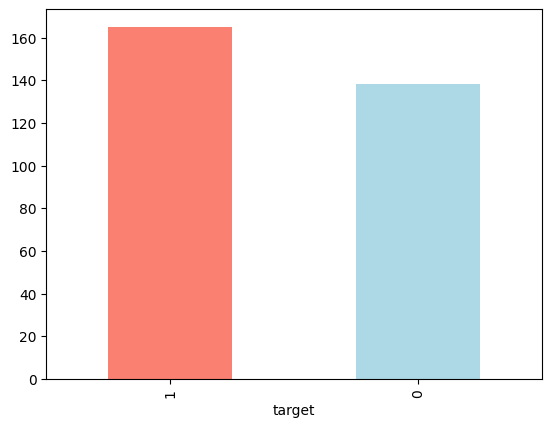

In [14]:
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [9]:
# Are there any missing values?
df.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [16]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# **Pair Plot**

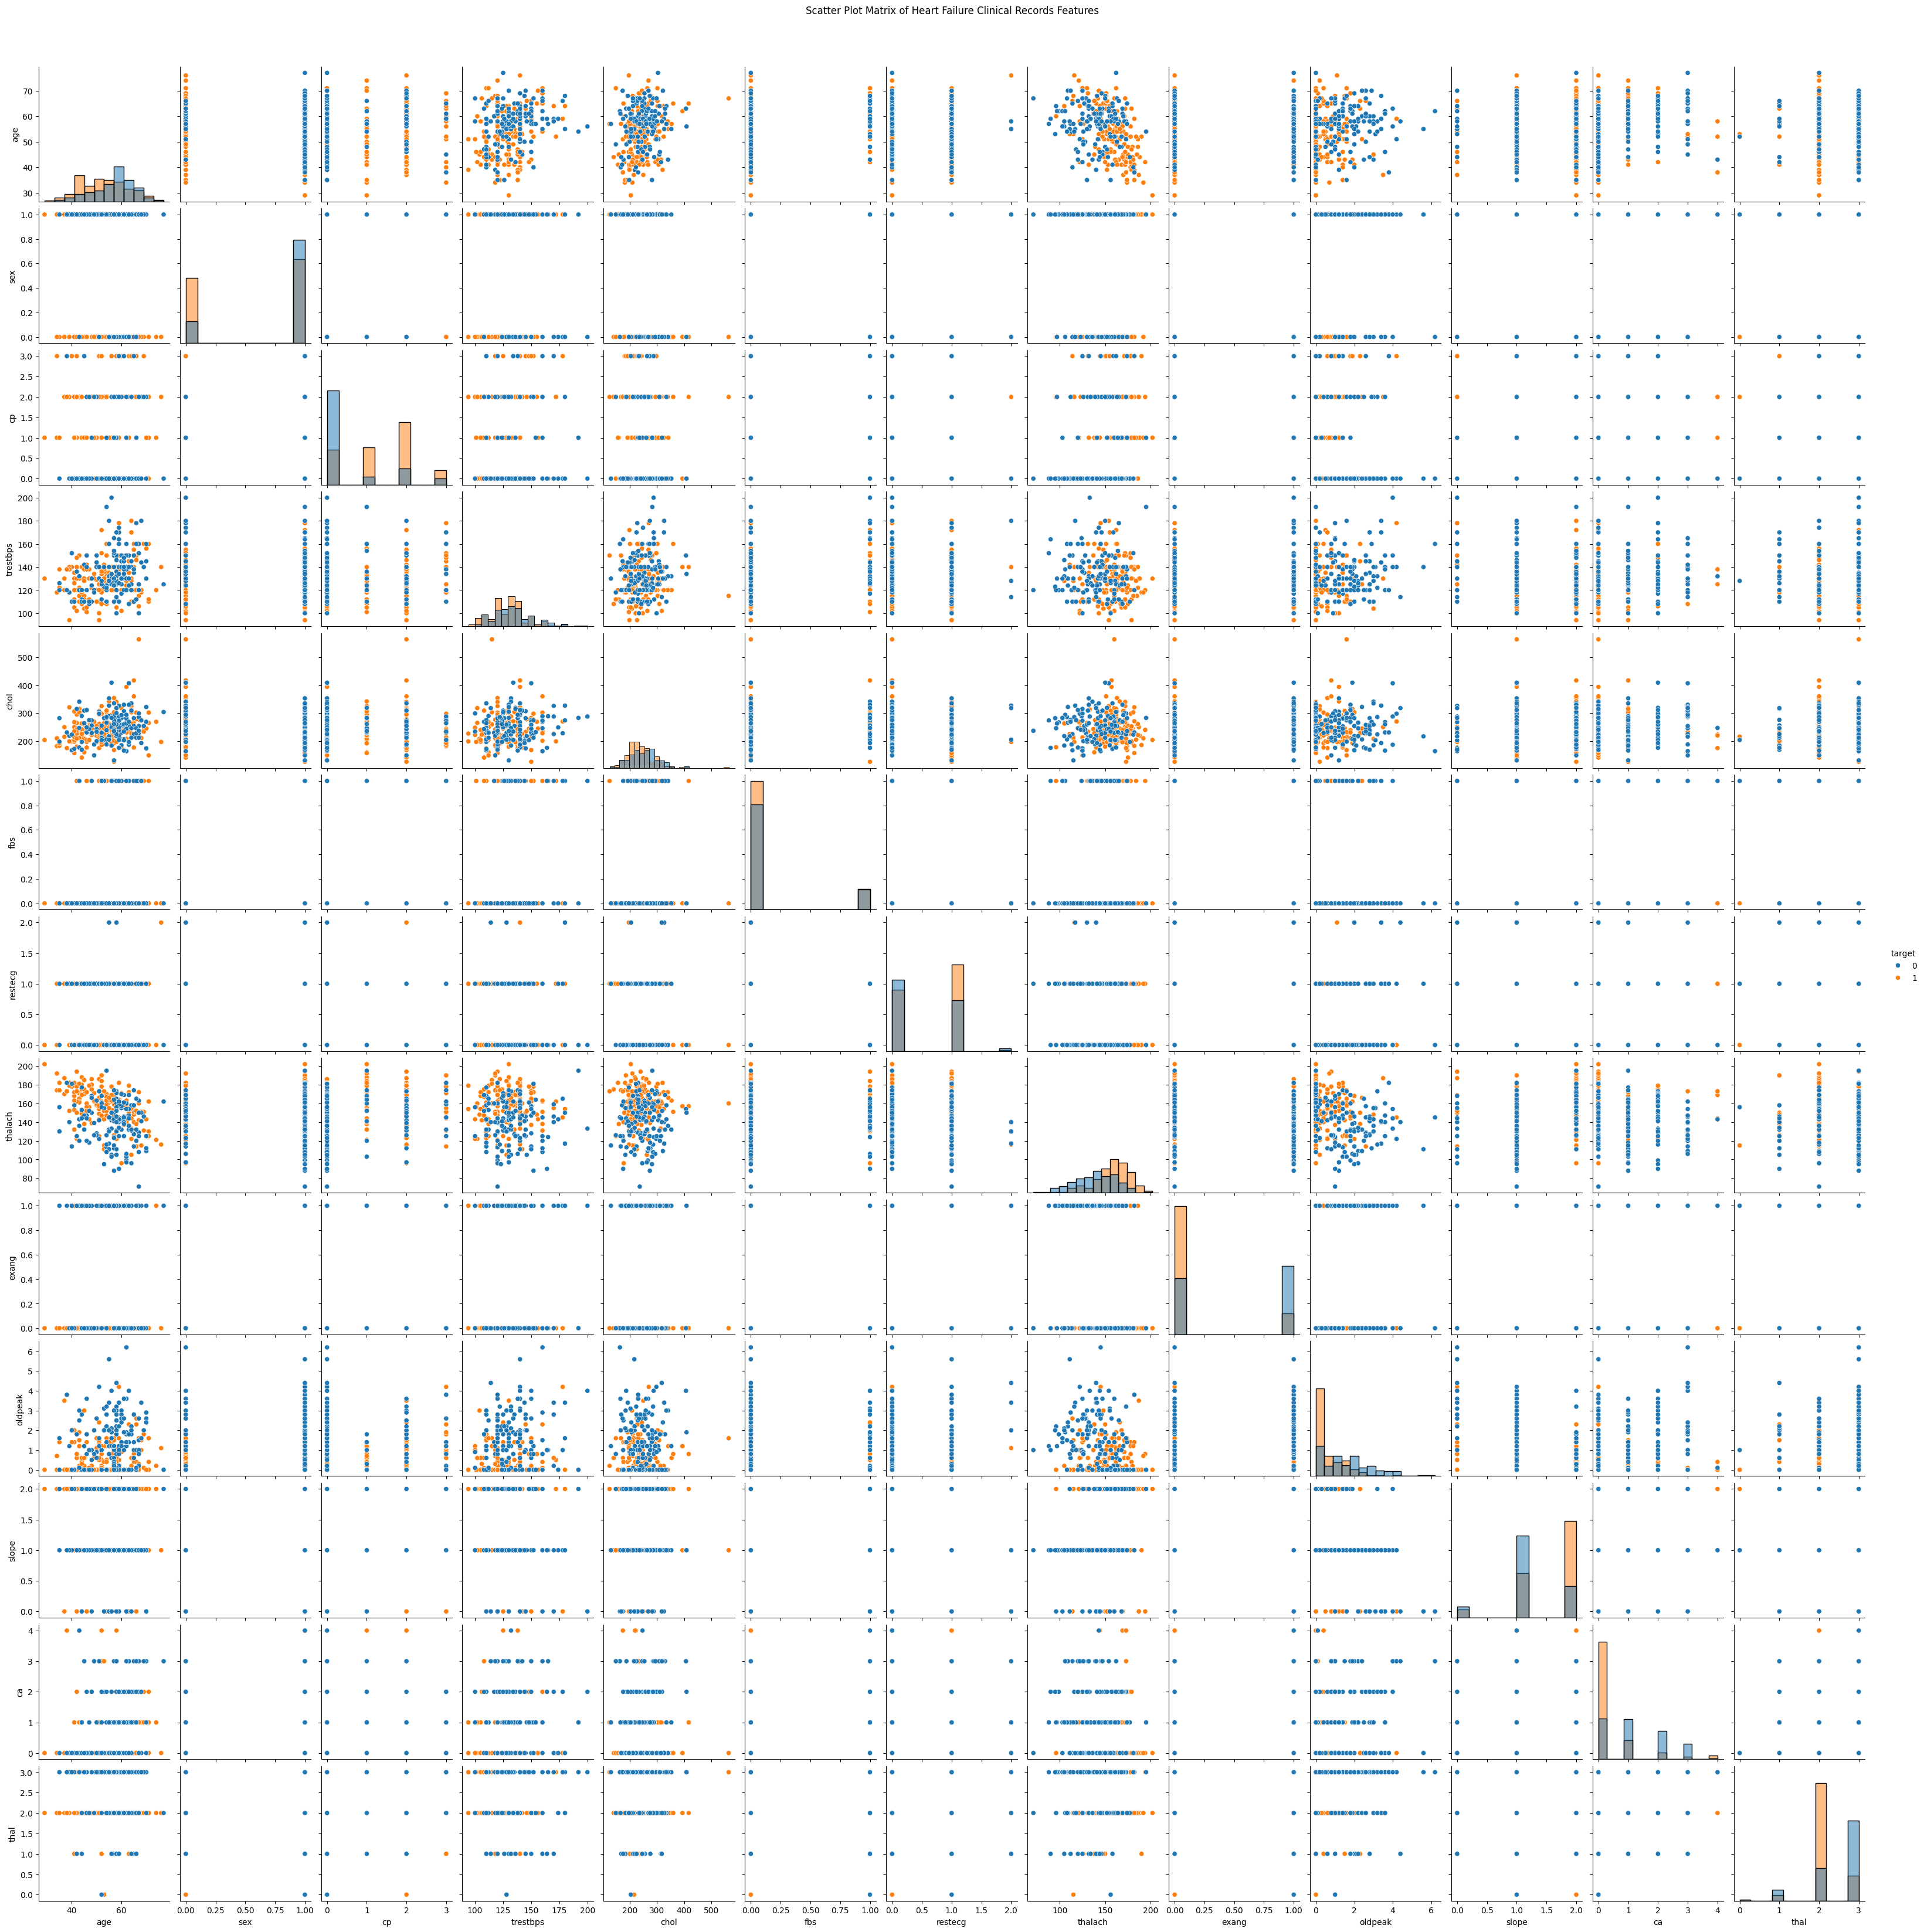

In [10]:
# Create a pairplot. The 'hue' parameter colors the points by the target variable.
sns.pairplot(df, hue='target', diag_kind='hist')
plt.suptitle('Scatter Plot Matrix of Heart Failure Clinical Records Features', y=1.02)
plt.show()

# **Corelation matrix**

In [38]:
corr_matrix = df.corr()
corr_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


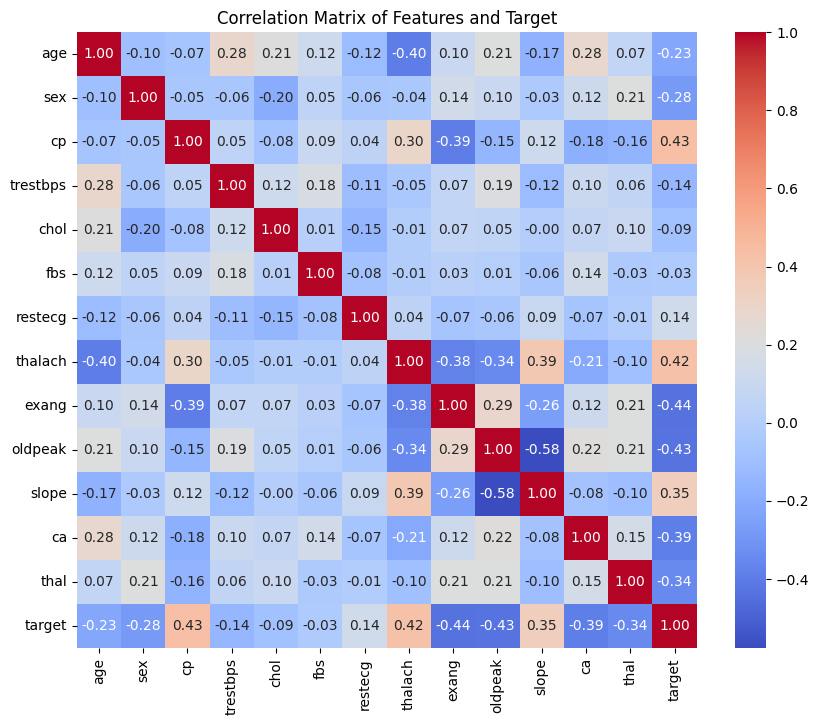

In [11]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features and Target')
plt.show()

1. **cp (chest pain type) and target (heart disease)**: There is a strong positive correlation (0.43) with heart disease, suggesting that chest pain type is an important factor in predicting heart disease.

2. **thalach (maximum heart rate) and target**: A moderate positive correlation (0.42) with heart disease indicates that a lower maximum heart rate could be linked to the presence of heart disease.

3. **age and target: There is a negative correlation (-0.23)**, suggesting that older individuals may be less likely to have heart disease, though the relationship is weak.

4. **sex and target**: A negative correlation (-0.28) indicates a slight inverse relationship between sex (likely male/female) and heart disease occurrence.

5. **oldpeak (depression induced by exercise) and target:** A strong negative correlation (-0.43) suggests that higher depression levels (oldpeak) during exercise are associated with a higher likelihood of heart disease.

6. **slope and target:** A moderate positive correlation (0.35) with heart disease, suggesting that the slope of the exercise ST segment might be relevant in heart disease diagnosis.

7. **exang (exercise induced angina) and target**: A negative correlation (-0.44) with heart disease suggests that exercise-induced angina is strongly related to the presence of heart disease.

# **Heart Disease Frequency according to Sex**

In [22]:
df.sex.value_counts()

,count
sex,
1,207
0,96


In [23]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


<Axes: xlabel='target'>

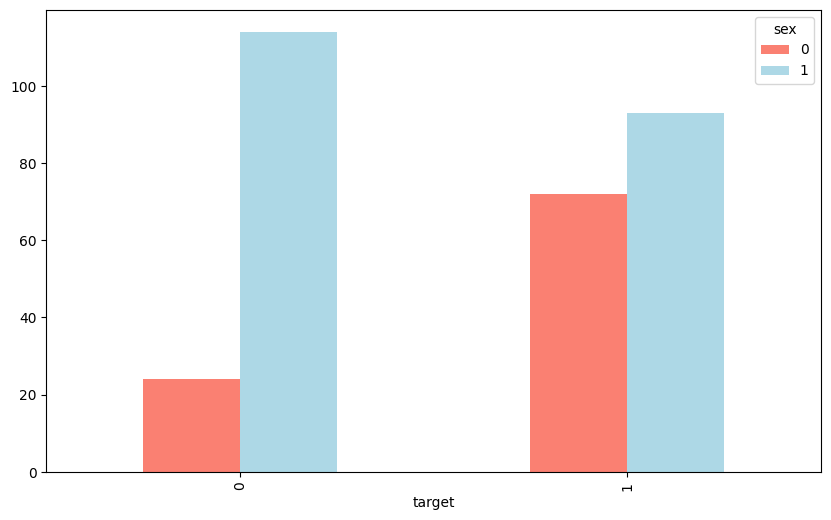

In [24]:
# Create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar", figsize=(10, 6), color=["salmon", "lightblue"])

**Females are more likely to have heart disease than males.**

According to the graph, 24 females have heart disease compared to 114 males. Additionally, 72 females have heart disease, while 93 males do.

# **Heart Disease Frequency per Chest Pain Type**

**cp - chest pain type**



*  0: Typical angina: chest pain related decrease blood supply to the heart
*   1: Atypical angina: chest pain not related to heart
*  2: Non-anginal pain: typically esophageal spasms (non heart related)
* 3: Asymptomatic: chest pain not showing signs of disease



In [34]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


* for cp = 0, the majority of individuals (104) do not have heart disease (target = 0), while 39 individuals have heart disease (target = 1).

* For cp = 1, there is a higher number of individuals with heart disease (41) compared to those without (9).

* For cp = 2, there is a significant increase in the number of individuals with heart disease (69) compared to those without (18), suggesting a strong association with heart disease.

* For cp = 3, there are 16 individuals with heart disease and 7 without, indicating a smaller, yet still notable, proportion of individuals with heart disease.

In summary, cp = 2 appears to have the highest proportion of individuals with heart disease, while cp = 0 is more likely to be associated with individuals without heart disease.

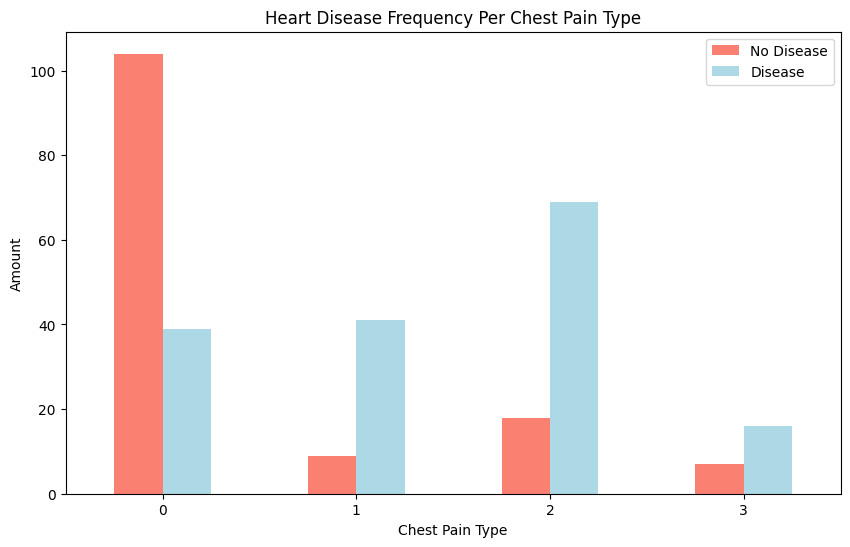

In [36]:
# Make the crosstab more visual
pd.crosstab(df.cp, df.target).plot(kind="bar", figsize=(10, 6), color=["salmon", "lightblue"])

# Add some info
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

**Opinion:** I believe that most people succumb to death before reaching pain level 3

# **Exang vs. Target**

***exang - exercise induced angina (1 = yes; 0 = no)***

In [40]:
pd.crosstab(df.exang, df.target)

target,0,1
exang,,
0,62,142
1,76,23


<Axes: xlabel='target'>

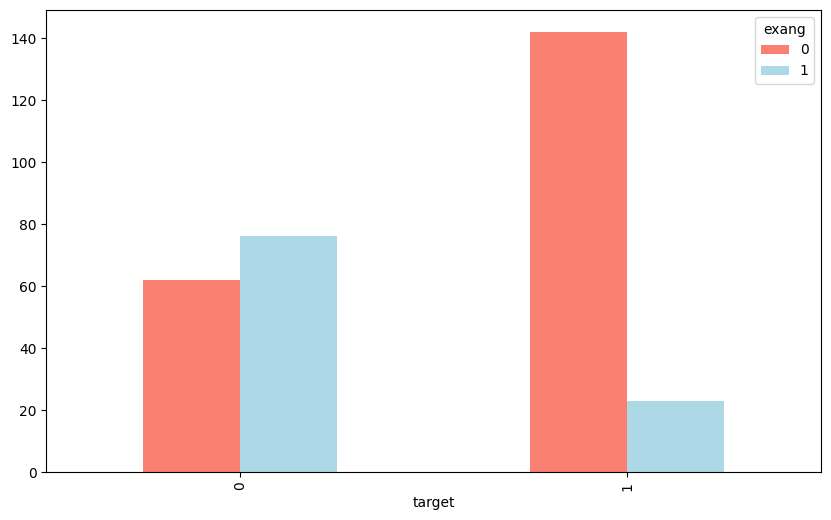

In [42]:
# Make the crosstab more visual
pd.crosstab(df.target, df.exang).plot(kind="bar", figsize=(10, 6), color=["salmon", "lightblue"])

People who experience exercise-induced angina (exang) are more likely to have heart disease, while those who do not experience it are more likely to have no disease. This is supported by the strong negative correlation (-0.44) between exang and heart disease in the dataset.

# **Age vs. Thalach (Max Heart Rate) for Heart Disease**

In [25]:
  df.thalach.count()

303

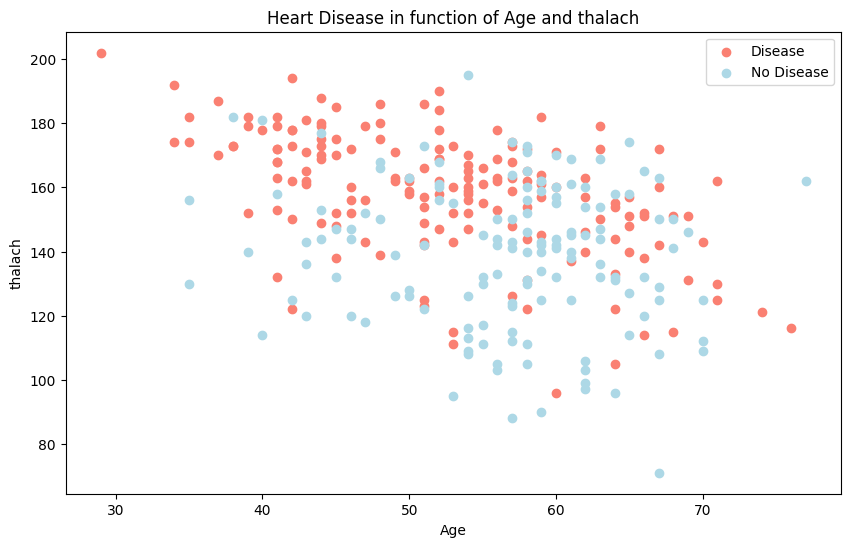

In [33]:
plt.figure(figsize=(10, 6))
# Scatter with postivie examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="salmon")

# Scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="lightblue")

# Add some helpful info
plt.title("Heart Disease in function of Age and thalach")
plt.xlabel("Age")
plt.ylabel("thalach")
plt.legend(["Disease", "No Disease"]);

We can observe a negative trend, where the older a person is, the lower their maximum heart rate tends to be. However, it is difficult to distinguish between those who have heart disease and those who do not based solely on this data. This is where machine learning can be helpful.

# **2. Modelling**

In [44]:
df.head(1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1


In [45]:
# Split data into X and y
X = df.drop("target", axis=1)
y = df["target"]

In [86]:
# Split data into train and test sets
np.random.seed(42)

# Split into train_val (80%) and test (20%) sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split train_val (80%) into train (60%) and validation (20%) sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)  # 0.25 * 80% = 20%

# Display shapes to verify the split
print("Dataset shape:", X.shape)
print("Train set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Test set shape:", X_test.shape)

Dataset shape: (303, 13)
Train set shape: (181, 13)
Validation set shape: (61, 13)
Test set shape: (61, 13)


In [87]:
from sklearn.preprocessing import StandardScaler
# Apply Z-Score Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

X_train_val_scaled = scaler.fit_transform(X_train_val)

We're going to try 3 different machine learning models:

1. Logistic Regression - [`sklearn.linear_model.LogisticRegression()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
2. K-Nearest Neighbors - [`sklearn.neighbors.KNeighboursClassifier()`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
3. RandomForest - [`sklearn.ensemble.RandomForestClassifier()`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

In [88]:
# Create a function to fit and score models
def fit_and_score(models, X_train, X_val, y_train, y_val):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_val : validation data (no labels)
    y_train : training labels
    y_val : validation labels
    """

    np.random.seed(42)
    model_scores = {}

    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_val, y_val)
    return model_scores

In [92]:
# model dictionary
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier()
}

model_scores = fit_and_score(models, X_train_scaled, X_val_scaled, y_train, y_val)
model_scores

{'Logistic Regression': 0.8032786885245902,
 'KNN': 0.7868852459016393,
 'Random Forest': 0.7704918032786885}

**Model Comparison:**

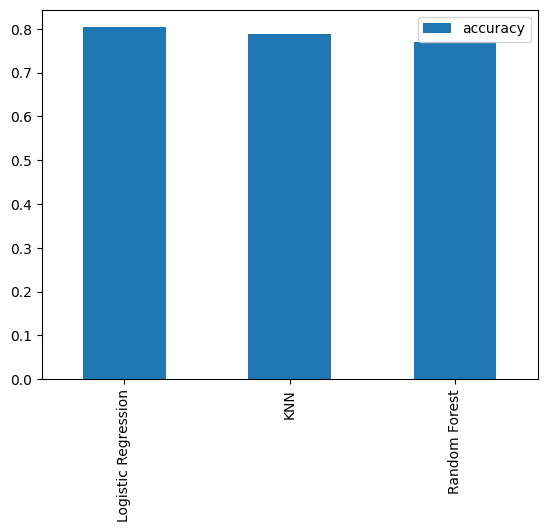

In [100]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

## **Hyperparameter tuning (by hand) KNN**

In [94]:
# Let's tune KNN

train_scores = []
test_scores = []

# Create a list of differnt values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train_scaled, y_train)
    train_scores.append(knn.score(X_train_scaled, y_train))
    test_scores.append(knn.score(X_val_scaled, y_val))

In [95]:
train_scores

[1.0,
 0.9171270718232044,
 0.8784530386740331,
 0.856353591160221,
 0.8453038674033149,
 0.861878453038674,
 0.8397790055248618,
 0.856353591160221,
 0.8397790055248618,
 0.856353591160221,
 0.8453038674033149,
 0.850828729281768,
 0.8287292817679558,
 0.8342541436464088,
 0.8176795580110497,
 0.8287292817679558,
 0.8287292817679558,
 0.8397790055248618,
 0.8232044198895028,
 0.8397790055248618]

In [96]:
test_scores

[0.7213114754098361,
 0.7540983606557377,
 0.7540983606557377,
 0.7704918032786885,
 0.7868852459016393,
 0.7704918032786885,
 0.7868852459016393,
 0.819672131147541,
 0.7704918032786885,
 0.8032786885245902,
 0.7704918032786885,
 0.819672131147541,
 0.7868852459016393,
 0.8360655737704918,
 0.8032786885245902,
 0.8032786885245902,
 0.7704918032786885,
 0.7704918032786885,
 0.7868852459016393,
 0.7704918032786885]

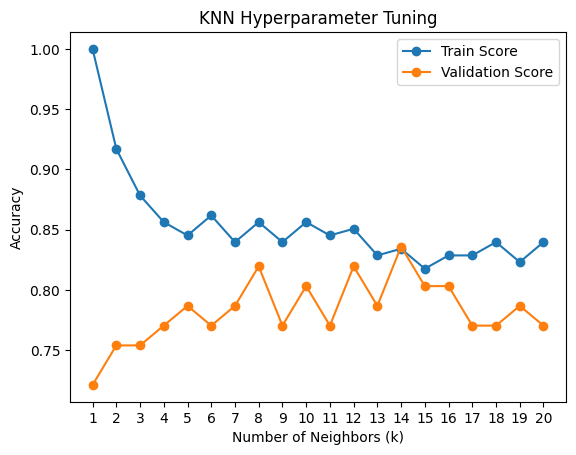

Maximum KNN score on the test data: 83.61%


In [97]:
plt.plot(neighbors, train_scores, label="Train Score", marker='o')
plt.plot(neighbors, test_scores, label="Validation Score", marker='o')

plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("KNN Hyperparameter Tuning")
plt.legend()
plt.show()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

1. Training the Model:
 * You fit (.fit()) the model using X_train_scaled and y_train.
 * This means the model learns from the training data.

2. Evaluating on the Training Set:
 * knn.score(X_train_scaled, y_train) calculates the training accuracy (how well the model predicts on the same data it was trained on).
 * This helps us see if the model is overfitting (too high accuracy on train but low on validation).

3. Evaluating on the Validation Set:
 * knn.score(X_val_scaled, y_val) calculates the validation accuracy (how well the model performs on unseen data).
 * This is the real test to see if the model generalizes well.

**Why Do We Check Train Score?**
  * If train accuracy is much higher than validation accuracy, it means the model memorized the training data (overfitting).
  * If both are low, the model is not learning well (underfitting).

**What Should You Look For?**
  * A small gap between training and validation accuracy means the model generalizes well.
  * A huge gap (high train, low validation) means overfitting.



In [ ]:
# Explanation of the train and validation scores:

# 1. Training Scores:
#    - At k=1, the training score is 1.0. This means the model perfectly classifies the training data,
#      which is typical for k=1 because the model essentially memorizes the training set.
#    - As k increases, the training score gradually decreases. This is expected because a higher value of k
#      smooths the decision boundary, meaning the model no longer fits the training data as perfectly.
#    - Lower training scores for higher k values indicate that the model is less flexible, reducing overfitting.

# 2. Validation Scores:
#    - The validation scores indicate how well the model generalizes to unseen data.
#    - Notice that the validation accuracy improves when k is increased from 1. For instance, at k=3,
#      the validation score is about 75.5%, which is better than the 72.13% at k=1.
#    - The validation score peaks around 81.6% for some values of k (e.g., k=14 or k=15).
#      This suggests that these k values offer a good balance between overfitting and underfitting.
#
# 3. Inference:
#    - A very high training score with a lower validation score (as seen at k=1) indicates overfitting.
#    - The goal is to choose a k value where the validation score is maximized, even if the training score is a bit lower.
#      This means the model generalizes well.
#    - Based on the scores, values like k=14 or k=15 (where the validation score is around 83.61%) would be good choices.
#
# 4. Final Thought:
#    - The tuning process shows the importance of balancing bias and variance. With k=1, the model has low bias(error) but high variance(overfitting),
#      and as k increases, the variance decreases while bias increases.
#      The optimal k is the one where this balance results in the highest validation accuracy.


So, the optimal k is either 14 or 15, where the accuracy increases from 78.68% to 83.61%.

# **Hyperparameter tuning with RandomizedSearchCV**

We're going to tune:

* LogisticRegression()
* RandomForestClassifier()

**Tuning models with with [`RandomizedSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)**

Reading the Scikit-Learn documentation for [`LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html#sklearn.linear_model.LogisticRegressionCV), we find there's a number of different hyperparameters we can tune.

The same for [`RandomForestClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).

Let's create a hyperparameter grid (a dictionary of different hyperparameters) for each and then test them out.

> **Note:** Be careful creating a hyperparameter dictionary for tuning as if there are typos in the keys of the dictionary, you will find that your code hyperparameter tuning code will produce errors.

In [102]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20), "solver": ["liblinear"]}

In [101]:
# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

Now let's use [`sklearn.model_selection.RandomizedSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) to try and tune our `LogisticRegression` model.

We'll pass it the different hyperparameters from `log_reg_grid` as well as set `n_iter=20`. This means, `RandomizedSearchCV` will try 20 different combinations of hyperparameters from `log_reg_grid` and save the best ones.

In [108]:
%%time
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(), param_distributions=log_reg_grid, cv=5, n_iter=20, verbose=True)

# Fit random hyperparameter search model
rs_log_reg.fit(X_train_scaled, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits
CPU times: user 391 ms, sys: 4.29 ms, total: 395 ms
Wall time: 391 ms


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [109]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [110]:
rs_log_reg.score(X_val_scaled, y_val)

0.819672131147541


> **Note:** Many of the algorithms in Scikit-Learn have pretty good default hyperparameter values so don't be surprised if they perform pretty good on your data straight out of the box. But don't take this as being true all the time. Just because the default hyperparameters perform pretty well on your data doesn't mean there aren't a better set of hyperparameter values out there.

Now we've tuned `LogisticRegression` using `RandomizedSearchCV`, we'll do the same for `RandomForestClassifier`.

In [111]:
%%time

# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(), param_distributions=rf_grid, cv=5, n_iter=20, verbose=True)

# Fit random hyperparameter search model
rs_rf.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits
CPU times: user 1min 32s, sys: 38.3 ms, total: 1min 32s
Wall time: 1min 40s


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [112]:
# Find the best parameters
rs_rf.best_params_

{'n_estimators': 560,
 'min_samples_split': 12,
 'min_samples_leaf': 9,
 'max_depth': 10}

In [113]:
# Evaluate the randomized search random forest model
rs_rf.score(X_val, y_val)

0.7868852459016393

Excellent! Tuning the hyperparameters for each model saw a slight performance boost in both the `RandomForestClassifier` and `LogisticRegression`.

But since `LogisticRegression` is pulling out in front, we'll try tuning it further with [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

# **Tuning a model with GridSearchCV**


Since `LogisticRegression` is pulling out in front, we'll try tuning it further with [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

Tuning a model with [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

The difference between `RandomizedSearchCV` and `GridSearchCV` is:

* [`sklearn.model_selection.RandomizedSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) searches over a grid of hyperparameters performing `n_iter` combinations (e.g. will explore random combinations of the hyperparameters for a defined number of iterations).
* [`sklearn.model_selection.GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) will test every single possible combination of hyperparameters in the grid (this is a thorough test but can take quite a long time).

Each class will save the best model at the end of testing.



In [127]:
%%time

# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(), param_grid=log_reg_grid, cv=5, verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train_scaled, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits
CPU times: user 515 ms, sys: 327 µs, total: 515 ms
Wall time: 966 ms


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [128]:
# Check the best parameters
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [130]:

# Evaluate the model
gs_log_reg.score(X_val_scaled, y_val)

0.819672131147541

In [116]:
model_scores

{'Logistic Regression': 0.8032786885245902,
 'KNN': 0.7868852459016393,
 'Random Forest': 0.7704918032786885}

Great! The model improved!!

In this case, we get the same results as before since our grid only has a maximum of 20 different hyperparameter combinations.

> **Note:** If there are a large number of hyperparameter combinations in your grid, `GridSearchCV` may take a long time to try them all out. This is why it's a good idea to start with `RandomizedSearchCV`, try a certain amount of combinations and then use `GridSearchCV` to refine them.

## **Evaluating a classification model, beyond accuracy**

In [131]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define the best model with optimized hyperparameters
final_model = LogisticRegression(C=1.623776739188721, solver='liblinear', random_state=42)

# Train the model on the full training set (train_val)
final_model.fit(X_train_val_scaled, y_train_val)

# Make predictions on the test set
y_pred = final_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.8525


Let's refresh ourselves on of the above metrics.

| **Metric/metadata** | **Explanation** |
| ----- | ----- |
| **Precision** | Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0. |
| **Recall** | Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0. |
| **F1 score** | A combination of precision and recall. A perfect model achieves an F1 score of 1.0. |
| **Support** | The number of samples each metric was calculated on. |
| **Accuracy** | The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0. |
| **Macro avg** | Short for macro average, the average precision, recall and F1 score between classes. Macro avg doesn’t class imbalance into effort, so if you do have class imbalances, pay attention to this metric. |
| **Weighted avg** | Short for weighted average, the weighted average precision, recall and F1 score between classes. Weighted means each metric is calculated with respect to how many samples there are in each class. This metric will favour the majority class (e.g. will give a high value when one class out performs another due to having more samples). |

In [132]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

# Print detailed classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Test Accuracy: 0.8525
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

Confusion Matrix:
 [[25  4]
 [ 5 27]]


* Precision & Recall are well-balanced (~0.87), meaning the model effectively distinguishes between classes.

* Confusion Matrix shows only 8 misclassifications (4 false positives, 4 false negatives)


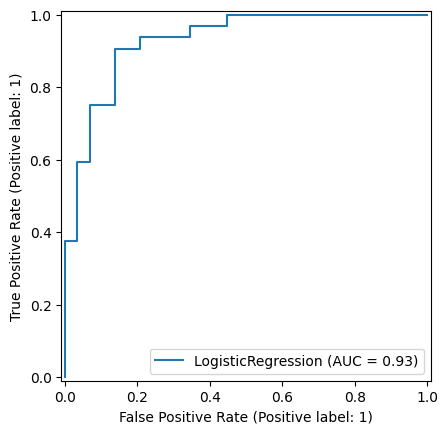

In [134]:
from sklearn.metrics import RocCurveDisplay

# from_estimator() = use a model to plot ROC curve on data
RocCurveDisplay.from_estimator(estimator=final_model, X=X_test_scaled, y=y_test);

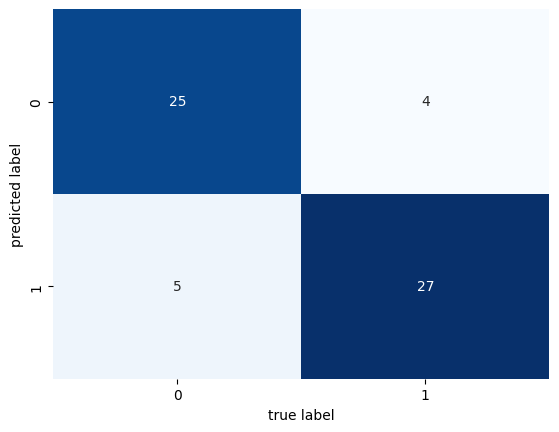

In [138]:

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("true label")
plt.ylabel("predicted label")
plt.show()


We'll take the best model along with the best hyperparameters and use [`cross_val_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) along with various `scoring` parameter values.

`cross_val_score()` works by taking an estimator (machine learning model) along with data and labels.

It then evaluates the machine learning model on the data and labels using cross-validation across `cv=5` (the default number of splits) splits and a defined `scoring` parameter.

In [140]:
%%time

# Cross-validated accuracy score
cv_acc = cross_val_score(final_model,
                         X,
                         y,
                         cv=5, # 5-fold cross-validation, this is the default
                         scoring="accuracy") # accuracy as scoring
cv_acc

CPU times: user 68.5 ms, sys: 673 µs, total: 69.1 ms
Wall time: 76.8 ms


array([0.81967213, 0.85245902, 0.85245902, 0.85      , 0.71666667])